In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv("D:/ML/Country-data.csv")

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df['exports']=df['exports']*df['gdpp']/100

In [6]:
df['imports']=df['imports']*df['gdpp']/100
df['health']=df['health']*df['gdpp']/100

In [7]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [8]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
df1=df.drop('country',axis=1)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()

In [12]:
df2=scaler.fit_transform(df1)

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca=PCA(svd_solver='randomized',random_state=42)

In [15]:
pca.fit(df2)

PCA(random_state=42, svd_solver='randomized')

In [16]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [17]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

<function matplotlib.pyplot.show(close=None, block=None)>

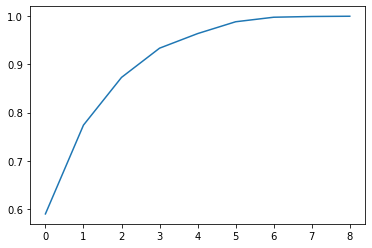

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show

In [19]:
from sklearn.decomposition import IncrementalPCA

In [20]:
pca_final=IncrementalPCA(n_components=3)

In [21]:
df_train_pca=pca_final.fit_transform(df2)

In [22]:
df_train_pca.shape

(167, 3)

In [23]:
pc=np.transpose(df_train_pca)

In [24]:
rownames=list(df['country'])

In [25]:
pcs_df2=pd.DataFrame({"country":rownames,"PC1":pc[0],"PC2":pc[1],"PC3":pc[2]})

In [26]:
pcs_df2.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


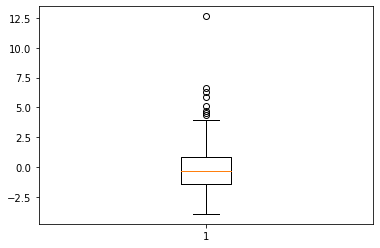

In [27]:
plt.boxplot(pcs_df2.PC1)
Q1=pcs_df2.PC1.quantile(0.05)
Q3=pcs_df2.PC1.quantile(0.95)
pcs_df2=pcs_df2[(pcs_df2.PC1>=Q1) & (pcs_df2.PC1<=Q3)]
plt.show()

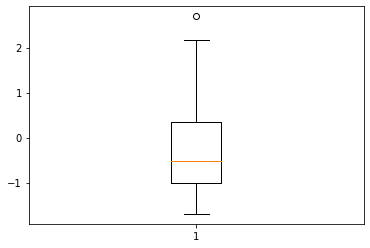

In [28]:
plt.boxplot(pcs_df2.PC2)
Q1=pcs_df2.PC2.quantile(0.05)
Q3=pcs_df2.PC2.quantile(0.95)
pcs_df2=pcs_df2[(pcs_df2.PC2>=Q1) & (pcs_df2.PC2<=Q3)]
plt.show()

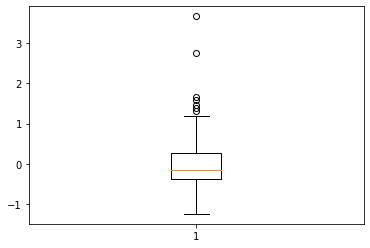

In [29]:
plt.boxplot(pcs_df2.PC3)
Q1=pcs_df2.PC3.quantile(0.05)
Q3=pcs_df2.PC3.quantile(0.95)
pcs_df2=pcs_df2[(pcs_df2.PC3>=Q1) & (pcs_df2.PC3<=Q3)]
plt.show()

In [30]:
pcs_df2.shape

(119, 4)

In [34]:
df3=pcs_df2
df3_1=scaler.fit_transform(df3.drop('country',axis=1))

In [35]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [36]:
sse=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k).fit(df3_1)
    sse.append([k,silhouette_score(df3_1,kmeans.labels_)])

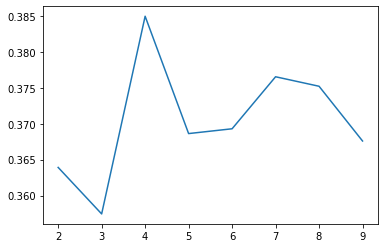

In [37]:
plt.plot(pd.DataFrame(sse)[0],pd.DataFrame(sse)[1]);

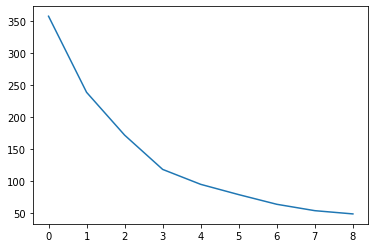

In [38]:
ssd=[]
for num_clusters in list(range(1,10)):
    model_clust=KMeans(n_clusters=num_clusters,max_iter=50)
    model_clust.fit(df3_1)
    ssd.append(model_clust.inertia_)
    
plt.plot(ssd)

In [39]:
model_clust5=KMeans(n_clusters=5,max_iter=50)

In [40]:
model_clust5.fit(df3_1)

KMeans(max_iter=50, n_clusters=5)

In [41]:
df4=df3

In [42]:
df4

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
2,Algeria,-0.457626,-0.673301,0.961867
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103
6,Armenia,-0.332692,-1.274517,0.176636
7,Australia,3.180362,-0.250785,-0.116877
...,...,...,...,...
160,Uruguay,0.456137,-1.098229,0.048968
161,Uzbekistan,-1.030563,-0.562941,0.743224
162,Vanuatu,-1.175019,-0.281317,-0.670433
164,Vietnam,-0.592402,-1.078224,0.510558


In [43]:
df4.index=pd.RangeIndex(len(df4.index))

In [44]:
df4

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Algeria,-0.457626,-0.673301,0.961867
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103
3,Armenia,-0.332692,-1.274517,0.176636
4,Australia,3.180362,-0.250785,-0.116877
...,...,...,...,...
114,Uruguay,0.456137,-1.098229,0.048968
115,Uzbekistan,-1.030563,-0.562941,0.743224
116,Vanuatu,-1.175019,-0.281317,-0.670433
117,Vietnam,-0.592402,-1.078224,0.510558


In [45]:
df_km=pd.concat([df4,pd.Series(model_clust5.labels_)],axis=1)

In [46]:
df_km.columns=["country","PC1","PC2","PC3","ClusterID"]

In [47]:
df_km

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,3
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,4
3,Armenia,-0.332692,-1.274517,0.176636,3
4,Australia,3.180362,-0.250785,-0.116877,1
...,...,...,...,...,...
114,Uruguay,0.456137,-1.098229,0.048968,4
115,Uzbekistan,-1.030563,-0.562941,0.743224,3
116,Vanuatu,-1.175019,-0.281317,-0.670433,4
117,Vietnam,-0.592402,-1.078224,0.510558,3


In [48]:
df_km["ClusterID"].value_counts()

4    42
3    26
1    24
0    16
2    11
Name: ClusterID, dtype: int64

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

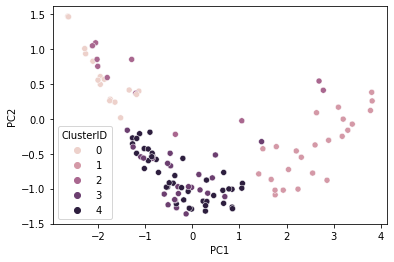

In [49]:
sns.scatterplot(x="PC1",y="PC2",hue="ClusterID",data=df_km)

<AxesSubplot:xlabel='PC2', ylabel='PC3'>

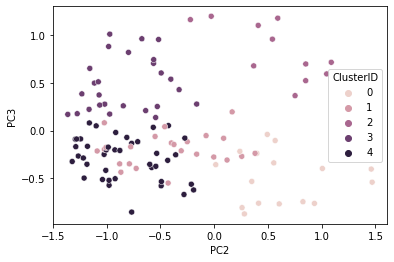

In [50]:
sns.scatterplot(x="PC2",y="PC3",hue="ClusterID",data=df_km)

<AxesSubplot:xlabel='PC3', ylabel='PC1'>

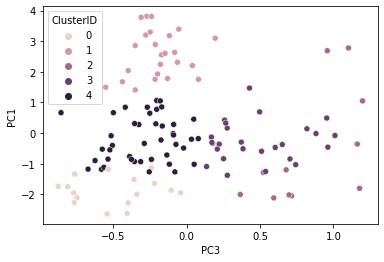

In [51]:
sns.scatterplot(x="PC3",y="PC1",hue="ClusterID",data=df_km)

In [52]:
df_km

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,3
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,4
3,Armenia,-0.332692,-1.274517,0.176636,3
4,Australia,3.180362,-0.250785,-0.116877,1
...,...,...,...,...,...
114,Uruguay,0.456137,-1.098229,0.048968,4
115,Uzbekistan,-1.030563,-0.562941,0.743224,3
116,Vanuatu,-1.175019,-0.281317,-0.670433,4
117,Vietnam,-0.592402,-1.078224,0.510558,3


In [53]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


In [59]:
df5=pd.merge(df,df_km,on='country')

In [60]:
df5

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.637442,1.469038,-0.541359,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.457626,-0.673301,0.961867,3
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649849,-1.024374,-0.250103,4
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,-0.332692,-1.274517,0.176636,3
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,3.180362,-0.250785,-0.116877,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Uruguay,10.6,3129.70,993.6500,3022.600,17100,4.91,76.4,2.08,11900,0.456137,-1.098229,0.048968,4
115,Uzbekistan,36.3,437.46,80.1780,393.300,4240,16.50,68.8,2.34,1380,-1.030563,-0.562941,0.743224,3
116,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,-1.175019,-0.281317,-0.670433,4
117,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,-0.592402,-1.078224,0.510558,3


In [61]:
df6=df5.drop(["PC1","PC2","PC3"],axis=1)

In [66]:
df6[df6['ClusterID']==0]['country'].unique()

array(['Afghanistan', 'Botswana', 'Comoros', 'Eritrea', 'Gambia', 'Kenya',
       'Lao', 'Liberia', 'Madagascar', 'Namibia', 'Pakistan', 'Rwanda',
       'Solomon Islands', 'South Africa', 'Tanzania', 'Uganda'],
      dtype=object)

In [67]:
df6[df6['ClusterID']==1]['country'].unique()

array(['Australia', 'Austria', 'Bahamas', 'Canada', 'Cyprus',
       'Czech Republic', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'Israel', 'Italy', 'Japan', 'Malta', 'New Zealand',
       'Portugal', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain',
       'Sweden', 'United Kingdom', 'United States'], dtype=object)

In [68]:
df6[df6['ClusterID']==2]['country'].unique()

array(['Congo, Rep.', 'Gabon', 'Ghana', 'Iraq', 'Kazakhstan', 'Kuwait',
       'Mauritania', 'Oman', 'Sudan', 'United Arab Emirates', 'Yemen'],
      dtype=object)

In [70]:
df6[df6['ClusterID']==3]['country'].unique()

array(['Algeria', 'Armenia', 'Azerbaijan', 'Bahrain', 'Belarus', 'Brazil',
       'Chile', 'China', 'Ecuador', 'Egypt', 'Georgia', 'Indonesia',
       'Iran', 'Jamaica', 'Jordan', 'Kyrgyz Republic', 'Libya',
       'Malaysia', 'Moldova', 'Nepal', 'Russia', 'Tajikistan', 'Turkey',
       'Ukraine', 'Uzbekistan', 'Vietnam'], dtype=object)

In [71]:
df6[df6['ClusterID']==4]['country'].unique()

array(['Antigua and Barbuda', 'Bangladesh', 'Barbados', 'Belize',
       'Bhutan', 'Bolivia', 'Bulgaria', 'Cambodia', 'Cape Verde',
       'Colombia', 'Croatia', 'Dominican Republic', 'El Salvador',
       'Estonia', 'Fiji', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'India', 'Latvia', 'Lithuania', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Morocco', 'Myanmar', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Samoa',
       'Seychelles', 'St. Vincent and the Grenadines', 'Suriname',
       'Tonga', 'Tunisia', 'Turkmenistan', 'Uruguay', 'Vanuatu'],
      dtype=object)

In [74]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [76]:
merging=linkage(df3_1,method='single',metric='euclidean')

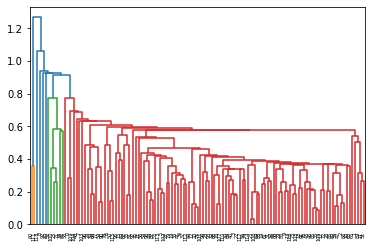

In [78]:
dendrogram(merging)
plt.show()

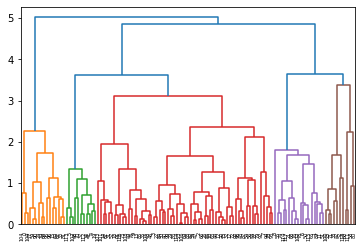

In [79]:
merging=linkage(df3_1,method='complete',metric='euclidean')
dendrogram(merging)
plt.show()

In [80]:
clustercut=pd.Series(cut_tree(merging,n_clusters=5).reshape(-1))

In [82]:
df3

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Algeria,-0.457626,-0.673301,0.961867
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103
3,Armenia,-0.332692,-1.274517,0.176636
4,Australia,3.180362,-0.250785,-0.116877
...,...,...,...,...
114,Uruguay,0.456137,-1.098229,0.048968
115,Uzbekistan,-1.030563,-0.562941,0.743224
116,Vanuatu,-1.175019,-0.281317,-0.670433
117,Vietnam,-0.592402,-1.078224,0.510558


In [83]:
df3_hc=pd.concat([df3,clustercut],axis=1)

In [88]:
df3_hc.columns=['country','PC1','PC2','PC3','ClusterID']

In [89]:
df3_hc

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2
3,Armenia,-0.332692,-1.274517,0.176636,2
4,Australia,3.180362,-0.250785,-0.116877,3
...,...,...,...,...,...
114,Uruguay,0.456137,-1.098229,0.048968,2
115,Uzbekistan,-1.030563,-0.562941,0.743224,1
116,Vanuatu,-1.175019,-0.281317,-0.670433,2
117,Vietnam,-0.592402,-1.078224,0.510558,1


In [91]:
df7=pd.merge(df,df3_hc,on='country')

In [92]:
df7

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.637442,1.469038,-0.541359,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649849,-1.024374,-0.250103,2
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,-0.332692,-1.274517,0.176636,2
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,3.180362,-0.250785,-0.116877,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Uruguay,10.6,3129.70,993.6500,3022.600,17100,4.91,76.4,2.08,11900,0.456137,-1.098229,0.048968,2
115,Uzbekistan,36.3,437.46,80.1780,393.300,4240,16.50,68.8,2.34,1380,-1.030563,-0.562941,0.743224,1
116,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,-1.175019,-0.281317,-0.670433,2
117,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,-0.592402,-1.078224,0.510558,1


In [93]:
df8=df7.drop(["PC1","PC2","PC3"],axis=1)

In [95]:
df8['ClusterID'].value_counts()

2    63
1    18
0    16
3    11
4    11
Name: ClusterID, dtype: int64

In [96]:
df8[df8['ClusterID']==0]['country'].unique()

array(['Afghanistan', 'Botswana', 'Comoros', 'Eritrea', 'Gambia', 'Kenya',
       'Lao', 'Liberia', 'Madagascar', 'Namibia', 'Pakistan', 'Rwanda',
       'Solomon Islands', 'South Africa', 'Tanzania', 'Uganda'],
      dtype=object)

In [97]:
df8[df8['ClusterID']==1]['country'].unique()

array(['Algeria', 'Azerbaijan', 'Bahrain', 'Belarus', 'Brazil', 'Chile',
       'Indonesia', 'Iran', 'Jamaica', 'Libya', 'Malaysia', 'Moldova',
       'Nepal', 'Russia', 'Turkey', 'Ukraine', 'Uzbekistan', 'Vietnam'],
      dtype=object)

In [98]:
df8[df8['ClusterID']==2]['country'].unique()

array(['Antigua and Barbuda', 'Armenia', 'Bahamas', 'Bangladesh',
       'Barbados', 'Belize', 'Bhutan', 'Bolivia', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'China', 'Colombia', 'Croatia', 'Cyprus',
       'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Greece', 'Grenada',
       'Guatemala', 'Guyana', 'Hungary', 'India', 'Israel', 'Italy',
       'Japan', 'Jordan', 'Kyrgyz Republic', 'Latvia', 'Lithuania',
       'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Morocco',
       'Myanmar', 'New Zealand', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Romania', 'Samoa',
       'Seychelles', 'Slovak Republic', 'Slovenia', 'South Korea',
       'Spain', 'St. Vincent and the Grenadines', 'Suriname',
       'Tajikistan', 'Tonga', 'Tunisia', 'Turkmenistan', 'Uruguay',
       'Vanuatu'], dtype=object)

In [99]:
df8[df8['ClusterID']==3]['country'].unique()

array(['Australia', 'Austria', 'Canada', 'Finland', 'France', 'Germany',
       'Iceland', 'Malta', 'Sweden', 'United Kingdom', 'United States'],
      dtype=object)

In [100]:
df8[df8['ClusterID']==4]['country'].unique()

array(['Congo, Rep.', 'Gabon', 'Ghana', 'Iraq', 'Kazakhstan', 'Kuwait',
       'Mauritania', 'Oman', 'Sudan', 'United Arab Emirates', 'Yemen'],
      dtype=object)